In [2]:
import os, sys
parentdir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.join(os.getcwd(), 'example_lin_elasticity_spikeslab.ipynb'))))
sys.path.append(parentdir)
#print(parentdir)
import numpy as np
#import matplotlib.pyplot as plt
import fenicsX_concrete
import json #math
import pandas as pd

Text(0.5, 0, 'step number')

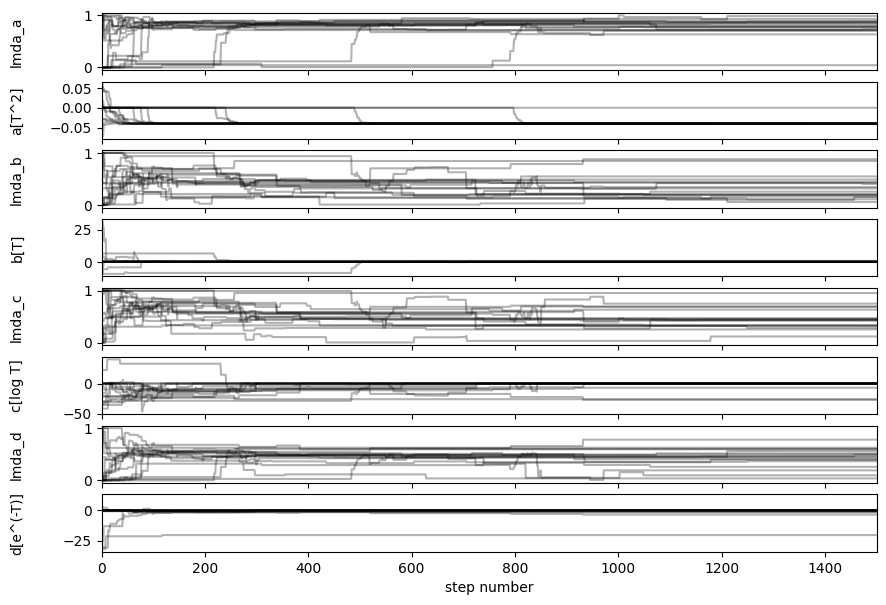

In [8]:
ndim =8
chain_data = np.loadtxt("posterior_spike_slab_5terms_25var", delimiter=',')
posterior = chain_data.reshape(chain_data.shape[0], chain_data.shape[1]// ndim, ndim)
posterior =posterior[:,:,:]
# chain_state/step number, chain_index, parameter_index
labels = ["lmda_a", "a[T^2]", "lmda_b", "b[T]", "lmda_c", "c[log T]", "lmda_d", "d[e^(-T)]"] # Change the labels over here if changes in parameters are made in json file.

import matplotlib.pyplot as plt
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(posterior[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(posterior))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

  warnings.warn(



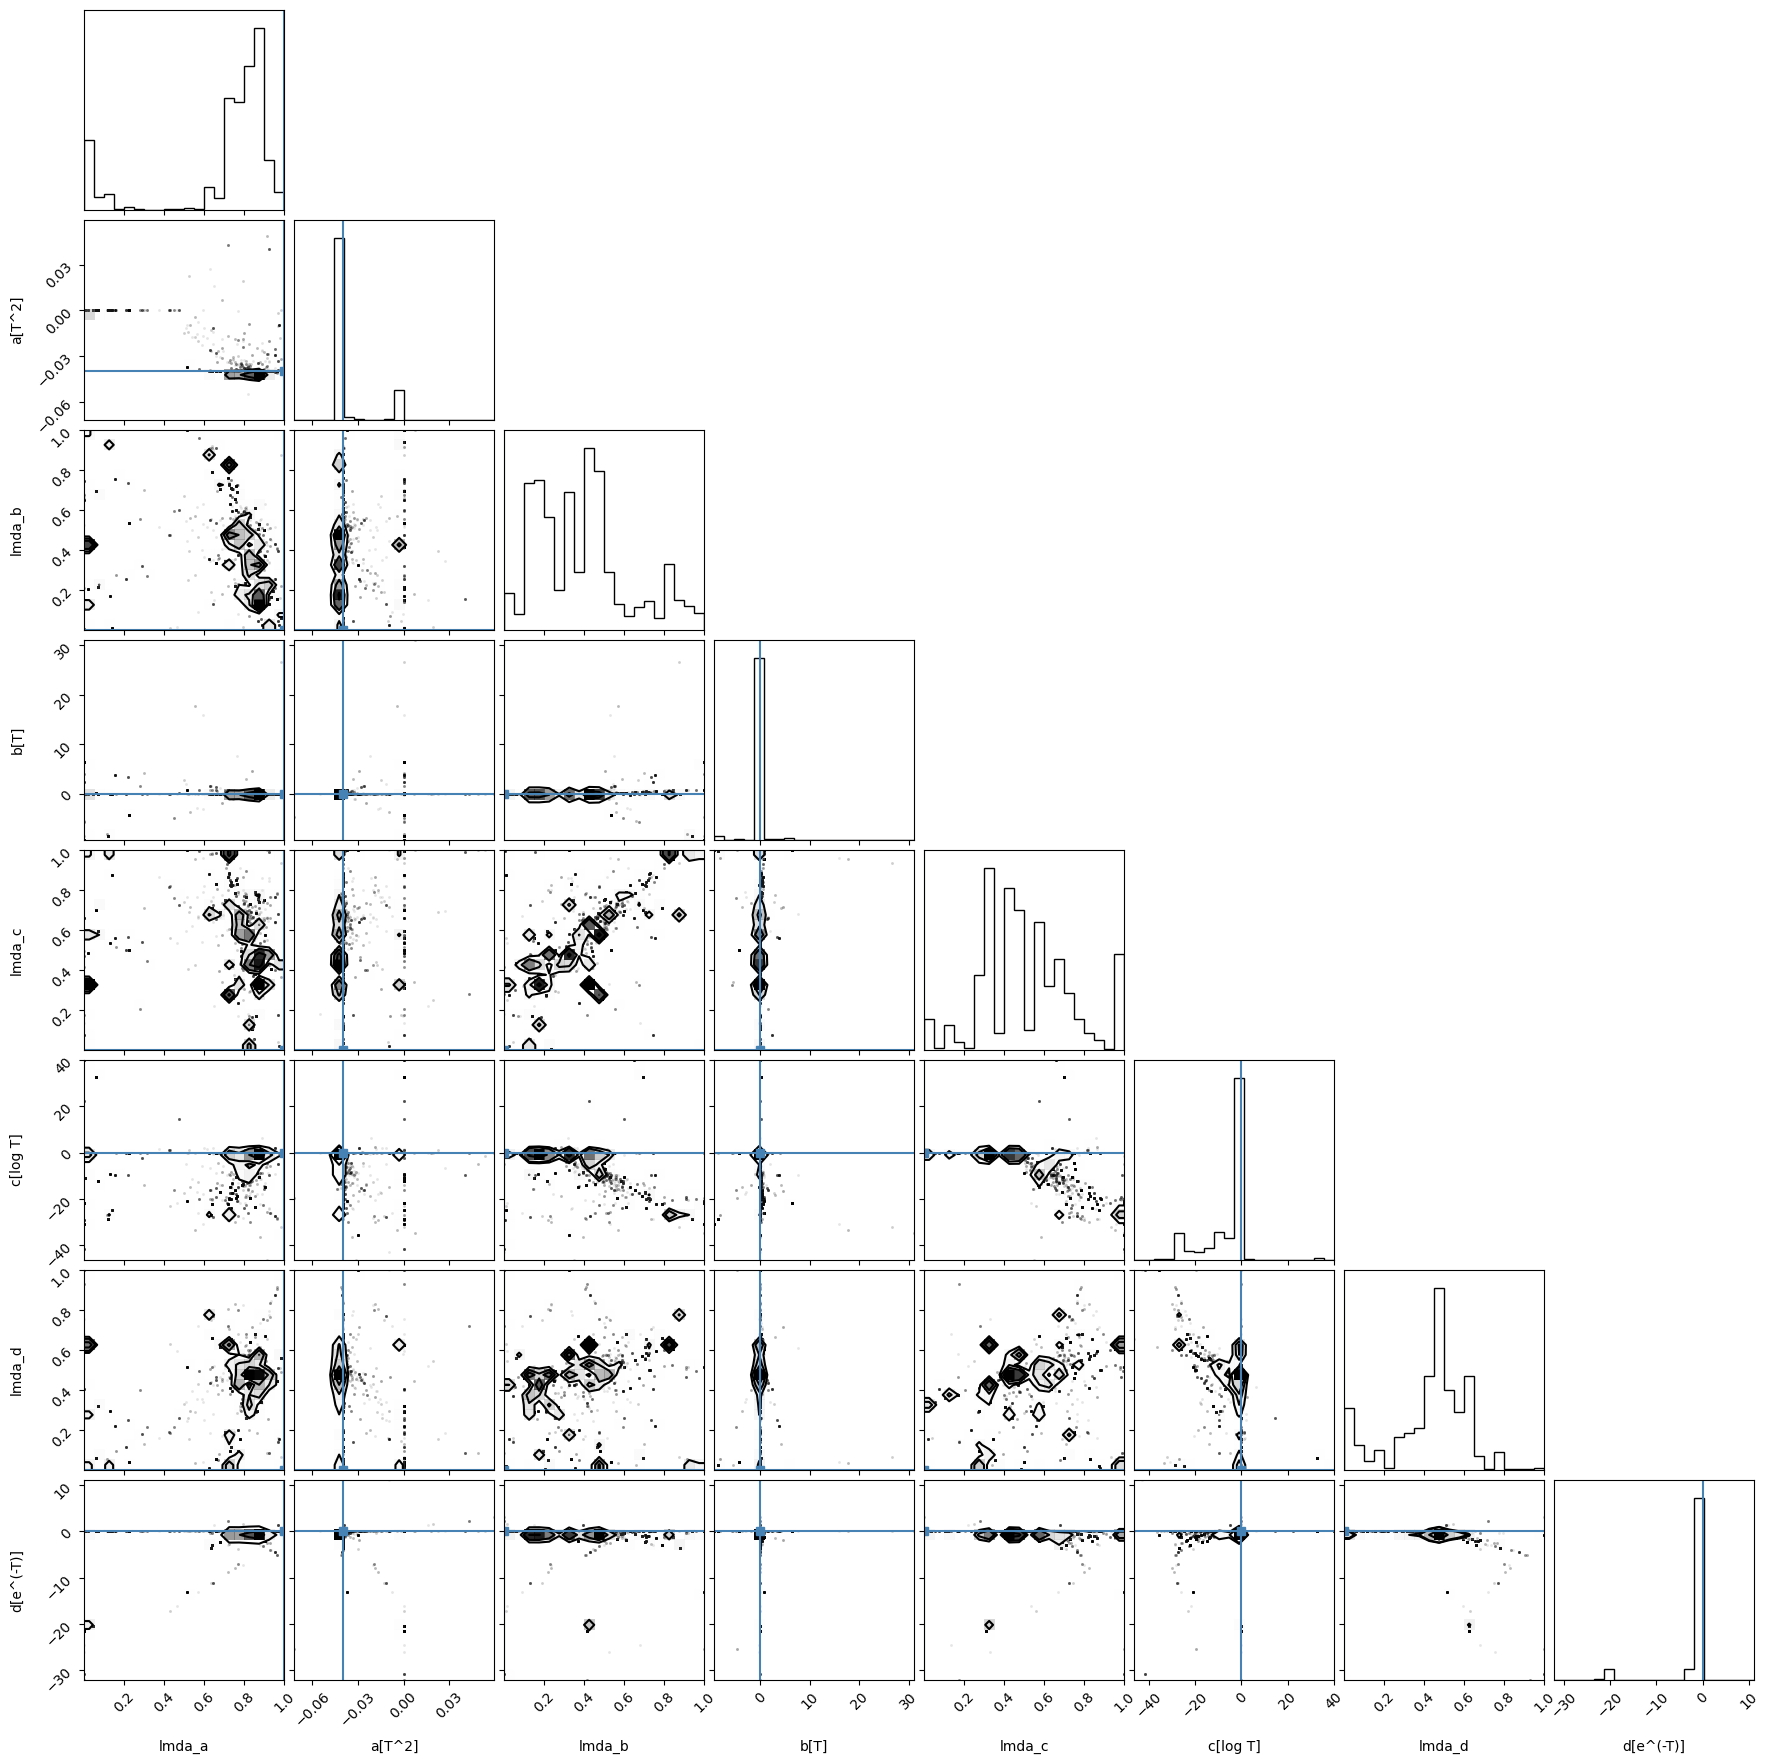

In [9]:
import corner
""" labels = ["lmbda_a", "a", "lmbda_b", "b", "lmbda_c", "c"]  # Change the labels over here if changes in parameters are made in json file.
fig = corner.corner(
    flat_samples, labels=labels, truths=[1, 235, 0, 0, 1, -0.04]
) """
# Change the labels over here if changes in parameters are made in json file.
fig = corner.corner(
    posterior, labels=labels, truths=[1, -0.04, 0, 0, 0, 0, 0, 0]
)